In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

In [2]:
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
pbmc = sc.datasets.pbmc68k_reduced()

In [4]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

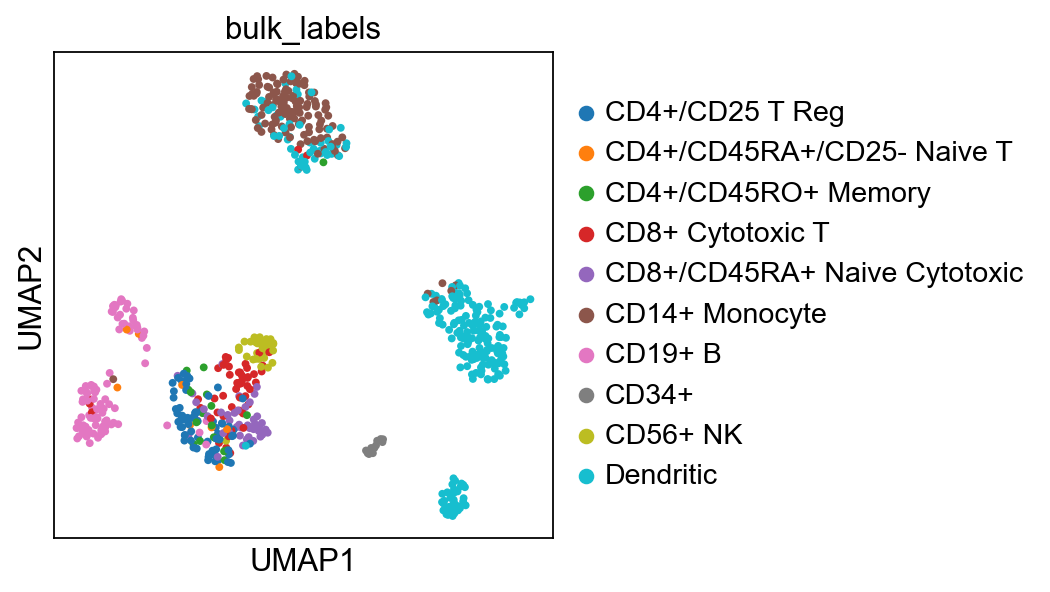

In [5]:
sc.pl.umap(pbmc, color=['bulk_labels'], s=50)

In [6]:
pbmc.uns['rank_genes_groups']

{'names': array([('RGS19', 'ITM2A', 'CAPG', 'CCL5', 'CD8B', 'C1QA', 'CD79A', 'PRSS57', 'GNLY', 'CST3'),
        ('HIST1H4C', 'RPL39', 'GABARAPL2', 'GNLY', 'CD8A', 'PSAP', 'CD79B', 'SNHG7', 'NKG7', 'LYZ'),
        ('IL32', 'TIMM10', 'FDX1', 'NKG7', 'RP11-291B21.2', 'COX14', 'MS4A1', 'SERPINB1', 'CD7', 'LST1'),
        ('GSTK1', 'CWC15', 'CRIP1', 'GZMH', 'CD7', 'NEAT1', 'IGJ', 'C19orf77', 'CLIC3', 'IRF7'),
        ('SKP1', 'CXCR4', 'GATA3', 'CHCHD7', 'NECAP2', 'NUP214', 'IGLL5', 'SPINK2', 'SPON2', 'C10orf54'),
        ('TMBIM6', 'LSM5', 'HPCAL1', 'SRSF2', 'ANAPC16', 'RAB7A', 'SPIB', 'IMPDH2', 'TYROBP', 'ZNHIT1'),
        ('CALM3', 'LSMD1', 'DNAJC1', 'ANXA1', 'SAMD3', 'OAS1', 'UBE2J1', 'H2AFY', 'GZMB', 'CD33'),
        ('COPE', 'SUPT4H1', 'C20orf27', 'MRFAP1', 'YWHAB', 'HMGB2', 'SMARCB1', 'EGFL7', 'PLAC8', 'ILK'),
        ('CD3E', 'SRSF7', 'MIEN1', 'DUSP2', 'CARS', 'SLTM', 'MZB1', 'CYTL1', 'FCER1G', 'IL32'),
        ('CAPN2', 'MTDH', 'ACAA1', 'KLRB1', 'HMGA1', 'TMEM176B', 'CCDC50', 'SNHG8

In [7]:
marker_genes = ['CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ',  'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'FCER1A', 'CST3']

In [8]:
pbmc.obs.louvain

index
AAAGCCTGGCTAAC-1    1
AAATTCGATGCACA-1    1
AACACGTGGTCTTT-1    3
AAGTGCACGTGCTA-1    9
ACACGAACGGAGTG-1    2
                   ..
TGGCACCTCCAACA-8    2
TGTGAGTGCTTTAC-8    1
TGTTACTGGCGATT-8    0
TTCAGTACCGGGAA-8    4
TTGAGGTGGAGAGC-8    2
Name: louvain, Length: 700, dtype: category
Categories (11, object): [0, 1, 2, 3, ..., 7, 8, 9, 10]

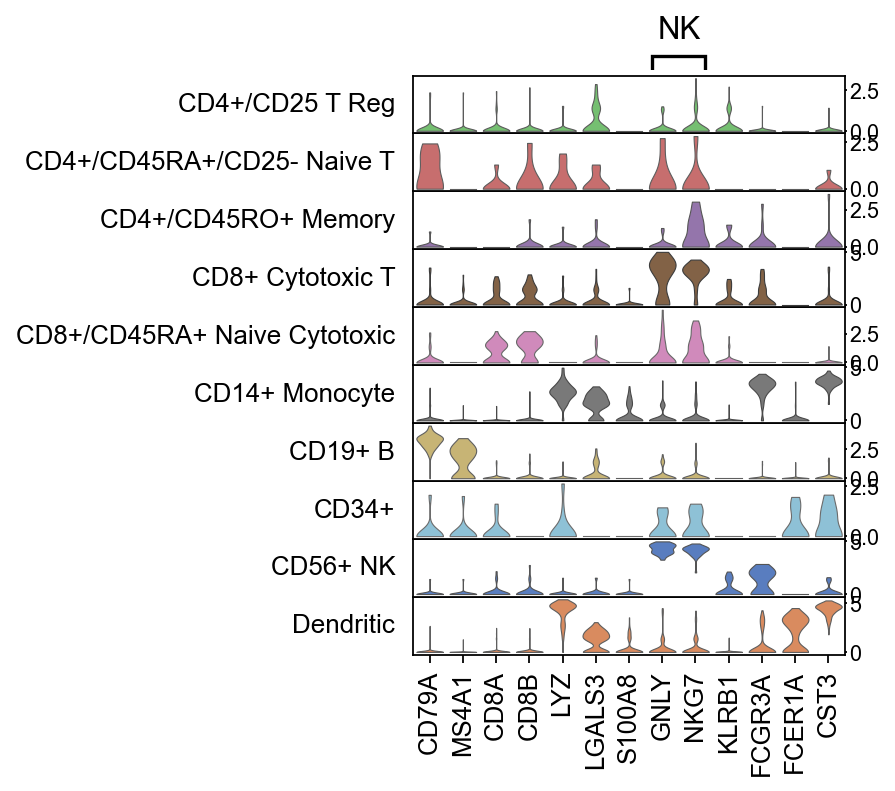

In [9]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels',
                         var_group_positions=[(7, 8)], var_group_labels=['NK'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_bulk_labels']`
categories: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.
var_group_labels: NK


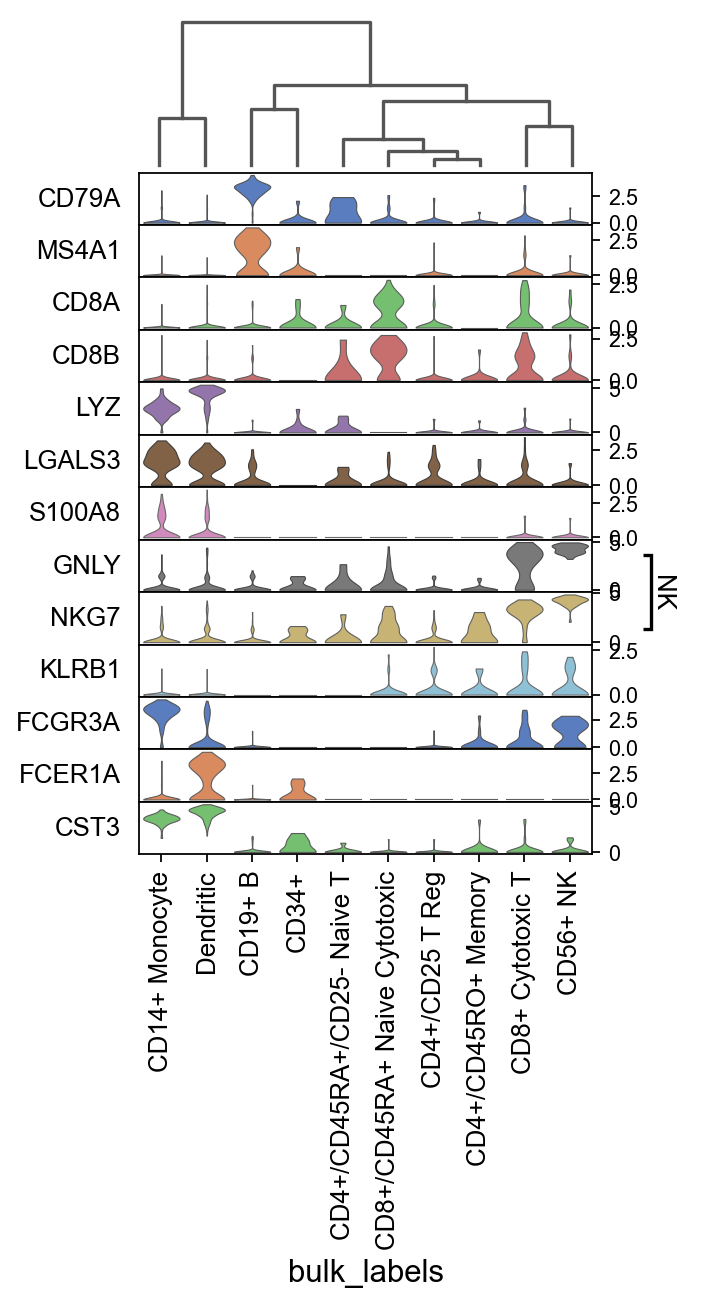

In [10]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels', swap_axes=True,
                         var_group_positions=[(7, 8)], var_group_labels=['NK'], dendrogram=True)

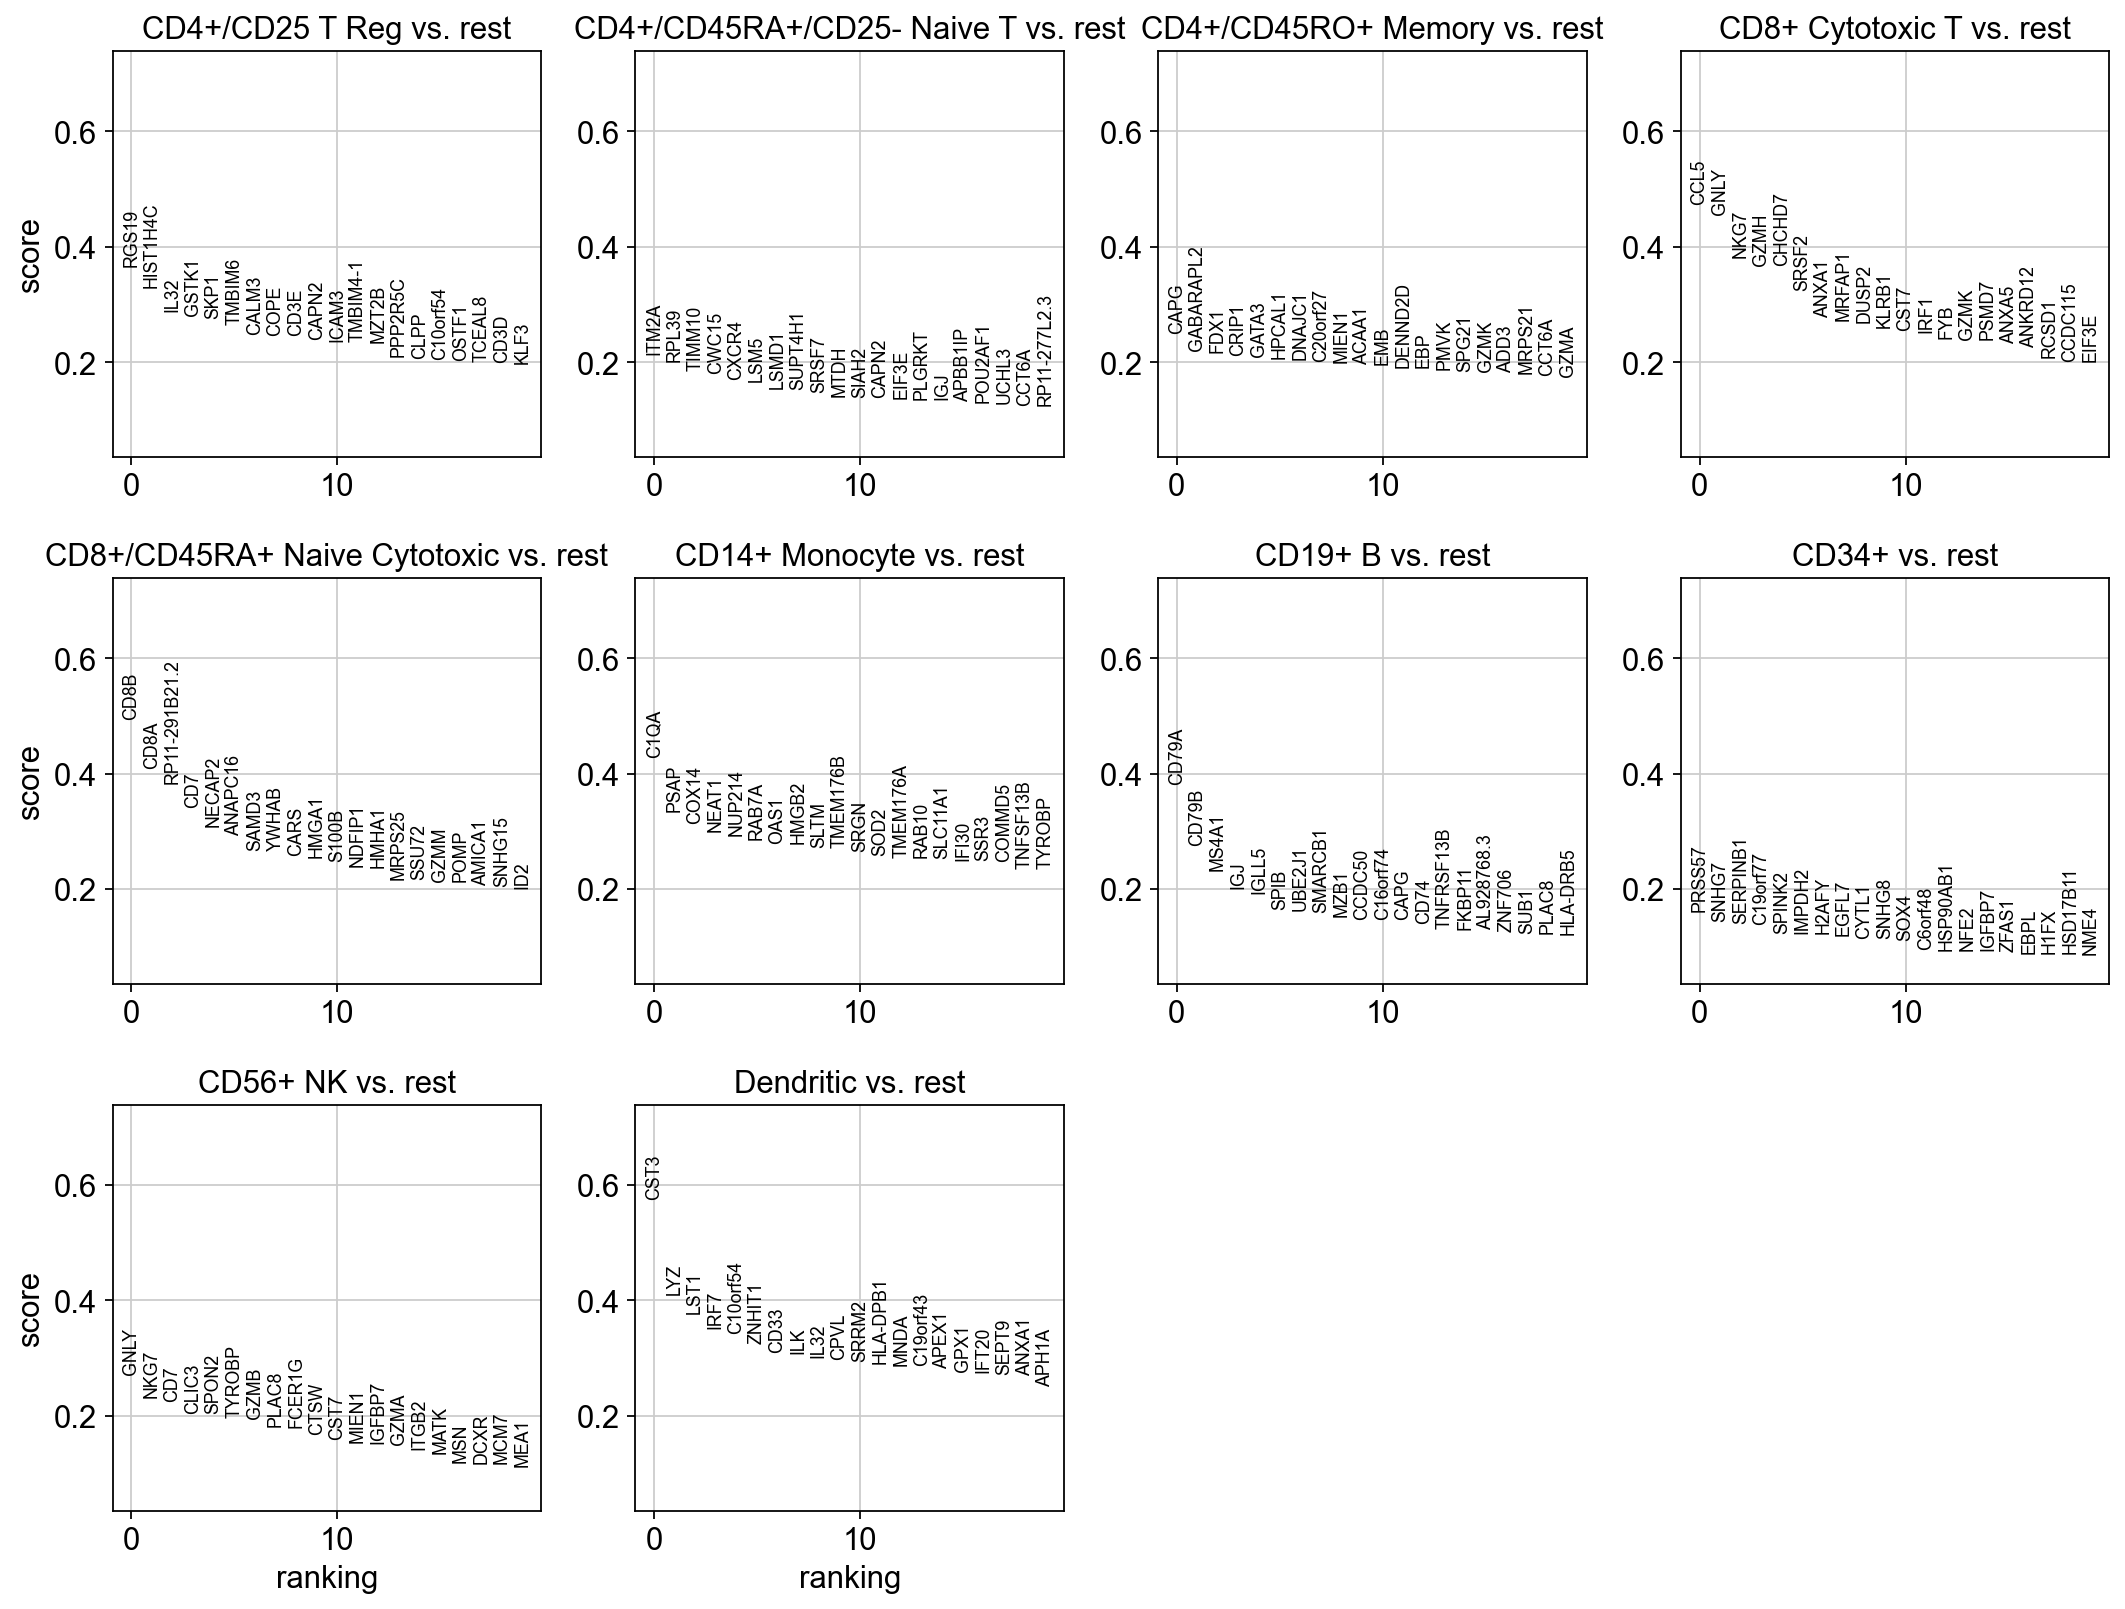

In [11]:
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(pbmc)

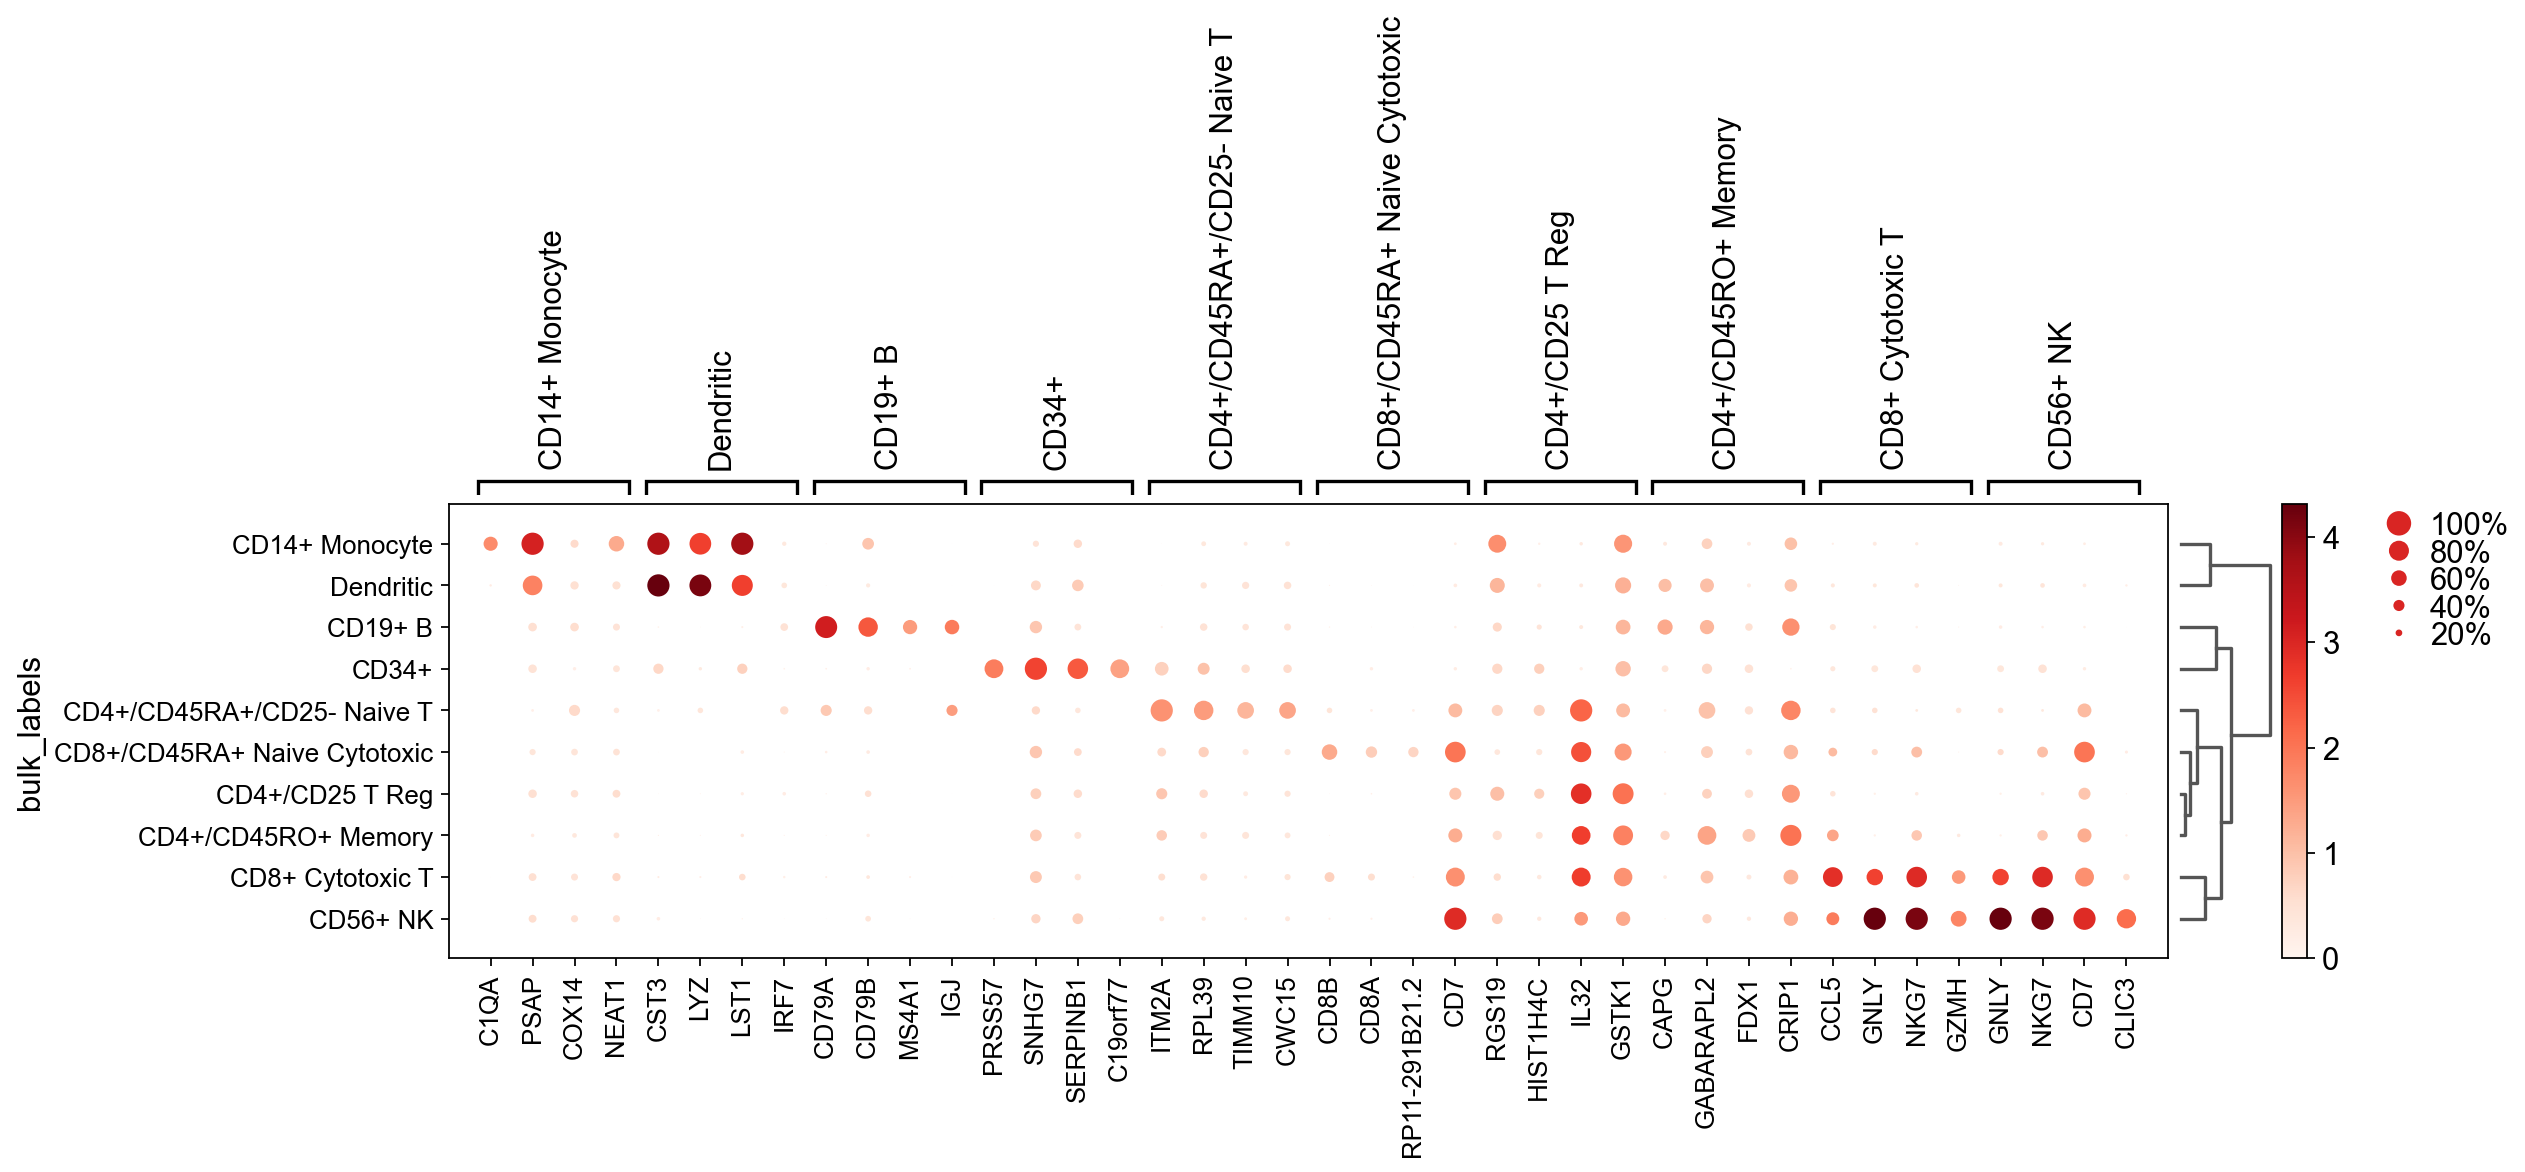

In [12]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

categories: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.
var_group_labels: Dendritic, CD19+ B


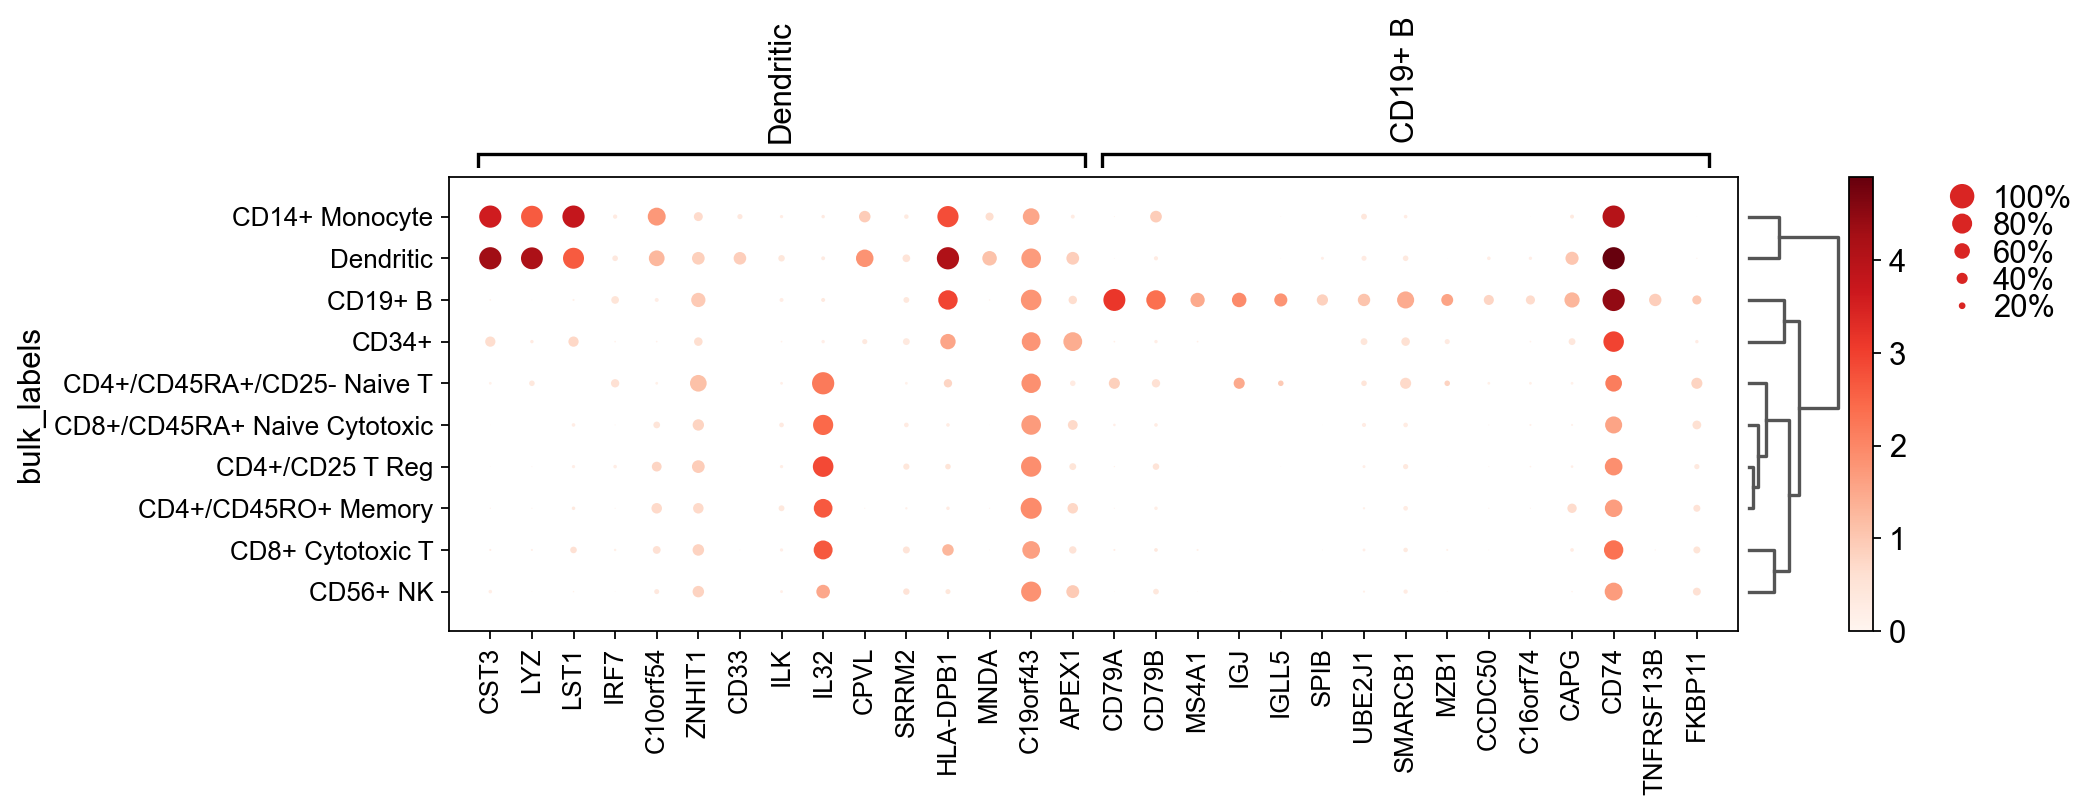

In [13]:
axs = sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=15, groups=['Dendritic', 'CD19+ B'])

In [14]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'dendrogram_bulk_labels'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

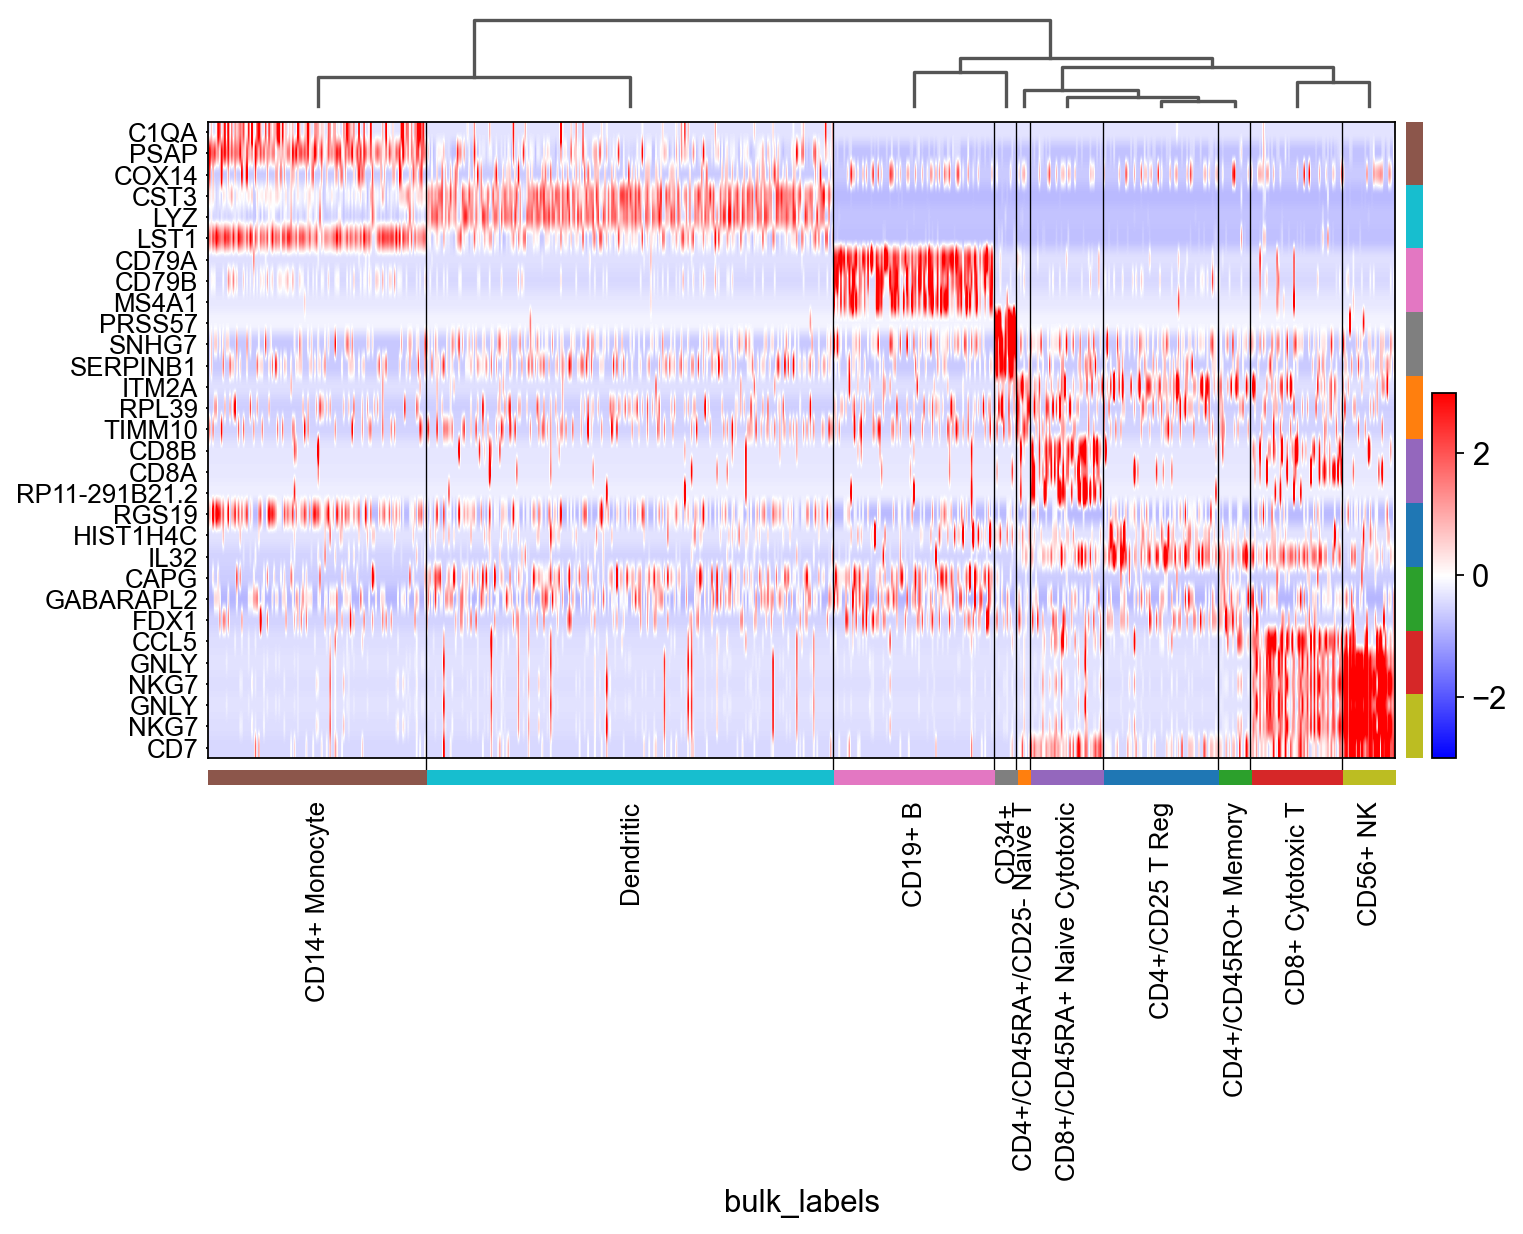

In [15]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr')